In [2]:
#to install basic libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [12]:
#importing necessary libraries
import pandas as pd #data manipulation
import numpy as np  #numerical operations
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [70]:
#Loading the given dataset 
df=pd.read_csv('WQP-Dataset.csv',sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [46]:
#Information of the dataset what type of data is stored in the csv dataset(int,float,digit(String))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [11]:
#rows and columns or the order of the array if
df.shape

(2861, 11)

In [71]:
#Statistics of the data(mean,min,standard deviation ,max)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [72]:
#Missing values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [73]:
#date is in object(String) and not accepted as date ----> converting to date format
df['date']=pd.to_datetime(df['date'],format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [74]:
#now checking the format of date after transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [75]:
df=df.sort_values(by=['id','date'])
df.head(10)

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.500,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.750,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.800,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.130,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.000,0.065,281.6,0.134,1462.0
5,1,2001-06-07,0.020,4.02,34.0,10.61,11.800,0.016,287.0,0.208,1183.0
6,1,2001-09-10,0.863,3.91,147.0,10.96,20.500,0.284,595.2,0.674,4023.0
7,1,2001-11-06,0.060,2.97,71.2,13.47,25.800,0.095,314.0,0.390,1907.0
8,1,2002-03-12,0.168,4.15,27.0,17.82,3.945,0.058,153.6,0.110,473.0
9,1,2002-06-06,0.001,7.11,74.4,19.28,2.260,0.017,409.6,0.181,1782.0


In [76]:
print(df.columns.tolist())
print(df.head())

['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
   id       date    NH4  BSK5  Suspended     O2    NO3    NO2    SO4    PO4  \
0   1 2000-02-17  0.330  2.77       12.0  12.30   9.50  0.057  154.0  0.454   
1   1 2000-05-11  0.044  3.00       51.6  14.61  17.75  0.034  352.0  0.090   
2   1 2000-09-11  0.032  2.10       24.5   9.87  13.80  0.173  416.0  0.200   
3   1 2000-12-13  0.170  2.23       35.6  12.40  17.13  0.099  275.2  0.377   
4   1 2001-03-02  0.000  3.03       48.8  14.69  10.00  0.065  281.6  0.134   

       CL  
0   289.5  
1  1792.0  
2  2509.0  
3  1264.0  
4  1462.0  


In [128]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# pd.to_datetime(...) =>Converts values to datetime
#errors='coerce'	  =>Forces invalid entries to become NaT (missing)
#df['date'] = ...	  =>Updates the column with converted values

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [59]:
df.head(10)

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
43,1,2010-01-12,0.291,3.27,16.7,12.30,59.20,0.090,278.4,0.370,1375.46,2010.0,1.0
4,1,2001-02-03,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.00,2001.0,2.0
41,1,2010-02-06,0.290,3.52,37.2,7.16,57.87,0.210,268.8,0.240,1120.20,2010.0,2.0
22,1,2005-02-09,0.000,3.68,28.5,14.20,15.51,0.033,422.4,0.900,2063.80,2005.0,2.0
62,1,2015-02-09,0.035,6.28,104.8,7.80,4.68,0.076,694.4,0.530,5615.28,2015.0,2.0
34,1,2008-03-09,0.100,3.40,0.0,77.15,6.82,109.000,3573.4,0.300,128.00,2008.0,3.0
42,1,2010-03-09,1.270,1.77,51.6,7.98,133.40,0.120,627.2,0.770,3750.60,2010.0,3.0
54,1,2013-03-09,0.750,7.50,129.2,4.95,1.43,0.031,748.8,0.440,5076.44,2013.0,3.0
58,1,2014-03-09,0.120,4.27,77.6,11.92,1.15,0.027,524.8,0.230,3814.42,2014.0,3.0
60,1,2015-04-02,0.004,2.62,46.6,13.51,6.75,0.034,422.4,0.170,2836.00,2015.0,4.0


In [78]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [6]:
pollutants=['NH4','BSK5','Suspended','NO3','NO2','SO4','PO4','CL']

In [ ]:
#WEEK 2  - 23 June 2025

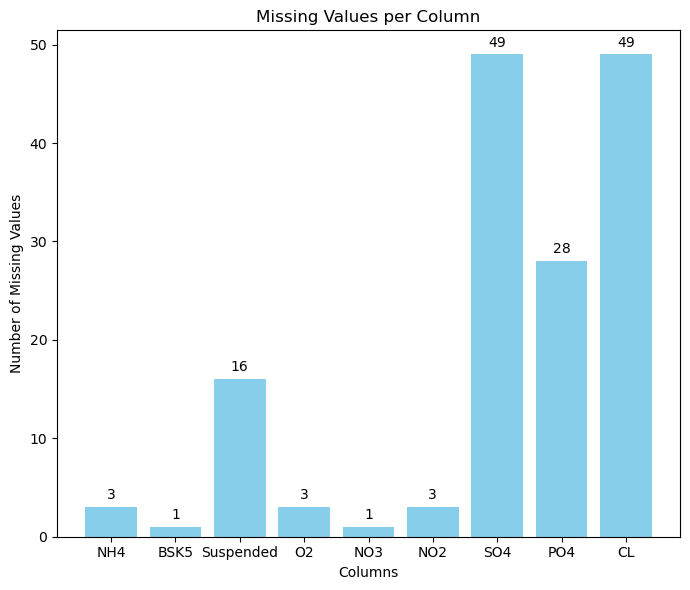

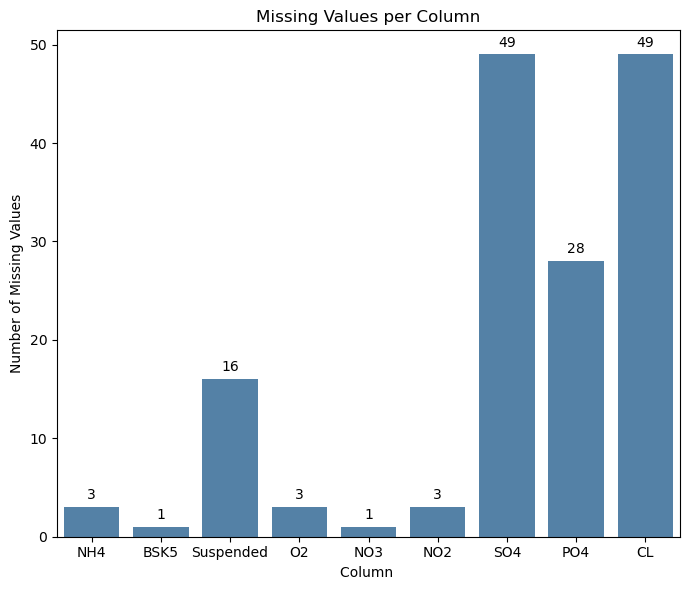

In [86]:
# Load your CSV file
df = pd.read_csv('WQP-Dataset.csv',sep=';')

#Finding the Missing values
missing_counts = df.isnull().sum()

# Filter columns that have missing values
missing_counts = missing_counts[missing_counts > 0]

# Plotting bar graph showing missing values
plt.figure(figsize=(7, 6))
bars = plt.bar(missing_counts.index, missing_counts.values, color='skyblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

print()

#seaborn
missing_df = missing_counts.reset_index()
missing_df.columns = ['Column', 'MissingValues']

plt.figure(figsize=(7, 6))
ax = sns.barplot(data=missing_df, x='Column', y='MissingValues', color='steelblue')
plt.title("Missing Values per Column")
plt.xlabel("Column ")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=0)

for i in ax.containers[0]:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2, height + 0.5, int(height), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [96]:
#dropping the missing values
df= df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [97]:
#shows total missing values
df.isnull().sum().sum()

3

In [105]:
# Feature and target selection - Feature - independent variable and Target dependent variable
# X is a feature (independent)
# y is the target (dependent on X)
X = df[['id', 'year']]
y = df[pollutants]

In [100]:
# Encoding - onehotencoder - 22 stations - 1 - 1
#get_dummies in Python is a pandas function used to convert categorical variables into numerical (binary) format, also called one-hot encoding.
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [103]:
# Train, Test and Split
#x_train & y_train is for training 
#x_test & y_test is for testing
#train_test_split train_test_split is a function from scikit-learn (sklearn) used to split your dataset into training and testing sets
#test_size is the splitting ratio 20%=0.2(used for testing purpose of the dataset) 
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [118]:
#train the model
model=MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
# RandomForestRegressor =>This creates a random forest model for regression:
# => n_estimators=100: Builds 100 decision trees.
# => random_state=42: Ensures results are repeatable every time you run the code.
# => But this can only predict ONE output column at a time by default.

#MultiOutputRegressor => This wraps the random forest so that it can handle multiple target columns (i.e., multi-output regression).
#Internally trains one separate random forest for each column in y_train.
#So if y_train has 3 columns, it trains 3 models , one for each output.

model.fit(X_train,y_train)
#trains the full model:
#It takes:
#X_train =>input features (e.g., water quality parameters)
#y_train =>multiple target values (e.g., different pollutant concentrations)
#And fits one random forest for each target column.
#.fit(X_train, y_train)=>Trains one model per output column


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [119]:
# Evaluate model
y_pred = model.predict(X_test)

In [120]:
print("Model Performance on the Test Data:")
#performance is given by R2 and not MSE
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
NH4:
   MSE: 0.753263408400881
   R2: 0.8380380704341939

BSK5:
   MSE: 6.9044226867522305
   R2: 0.12485611660384843

Suspended:
   MSE: 219.18114605934753
   R2: -0.9298956650047834

NO3:
   MSE: 19.996805877860137
   R2: 0.49322035001803366

NO2:
   MSE: 5.925260653333953
   R2: -12.153129324870886

SO4:
   MSE: 1691.2145677372434
   R2: 0.5896446561888187

PO4:
   MSE: 0.32365740565208945
   R2: 0.3569677784819518

CL:
   MSE: 33781.730068365214
   R2: 0.7442816579977115



In [126]:
station_id = '22'  # <- replace with a real station ID in quotes
year_input = 2024  # year of prediction

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]}) #giving dictionary in key value pairs
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
#If any columns are missing, they are added with zero values, above code
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]
#[0] extracts the first (and only) row of predictions from the result,above

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  NH4: 0.04
  BSK5: 2.48
  Suspended: 5.90
  NO3: 6.59
  NO2: 0.18
  SO4: 143.24
  PO4: 0.48
  CL: 67.32


In [127]:
#joblib is a Python library used to save and load machine learning models and other Python objects efficiently.
import joblib
#This file stores all the information the model has learned — so you can use it later for prediction,below
joblib.dump(model, 'pollution_model.pkl') #	Saves the trained model
#Saves the list of feature column names from your training data,below
#During prediction, your input data must have the same structure (same columns in the same order).
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl") #Saves the feature column names

print('Model and column structure are saved!')

Model and column structure are saved!
